In [2]:
! pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------- ----------- 5.8/8.1 MB 29.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 32.5 MB/s  0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 54.0 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 62.3 MB/s  0:00:00

   ---------------------------------------- 0/7 [pillow]
   ---------------------------------------- 0/7 [pillow]
   ---------------------------------------- 0/7 [pillow]
   ---------------------------------------- 0/7 [pillow]
   ----- --------------------

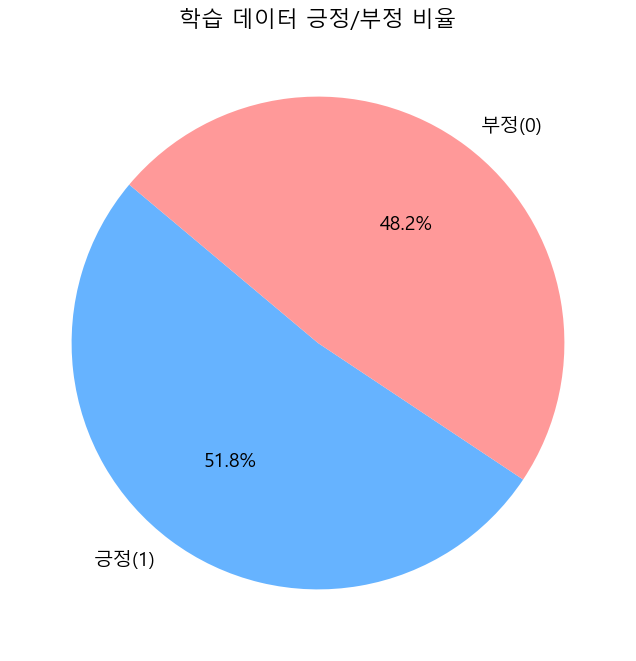

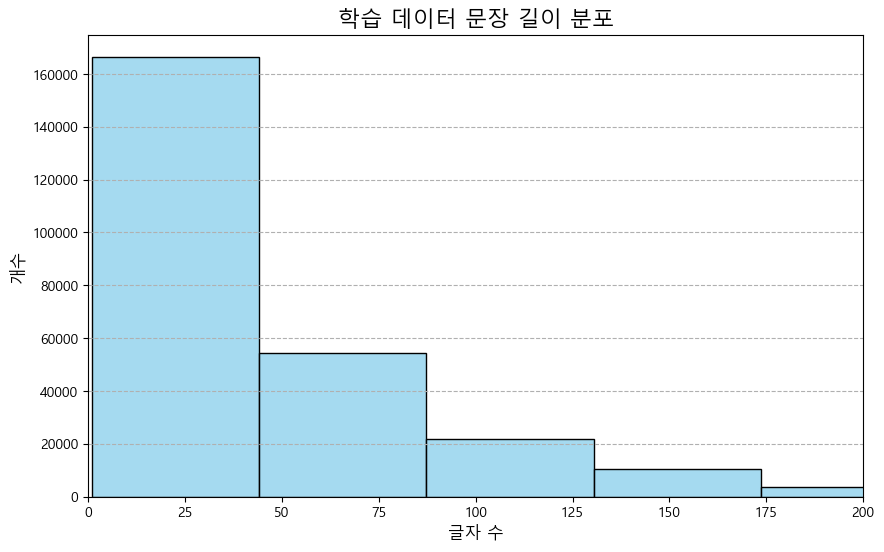

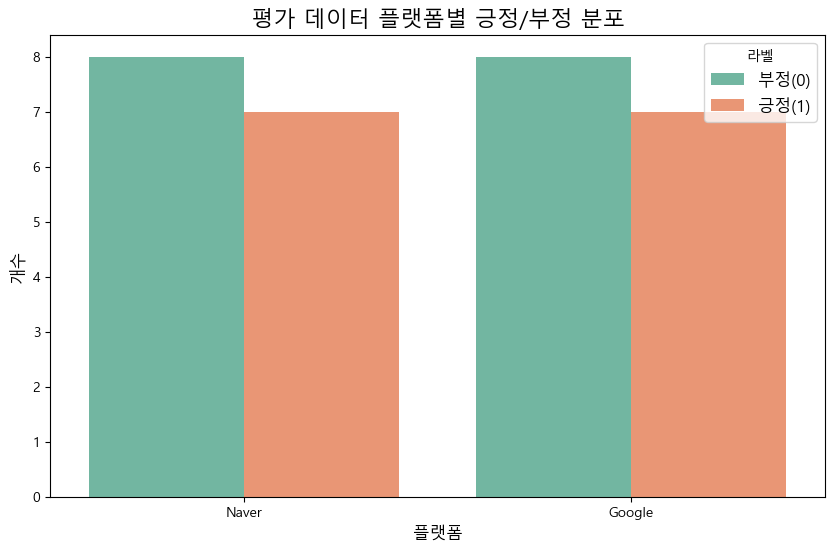

C:\Users\dosl1\AppData\Local\Temp\ipykernel_23708\752535842.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y='Length', data=comp_df, palette='Pastel1', width=0.6)


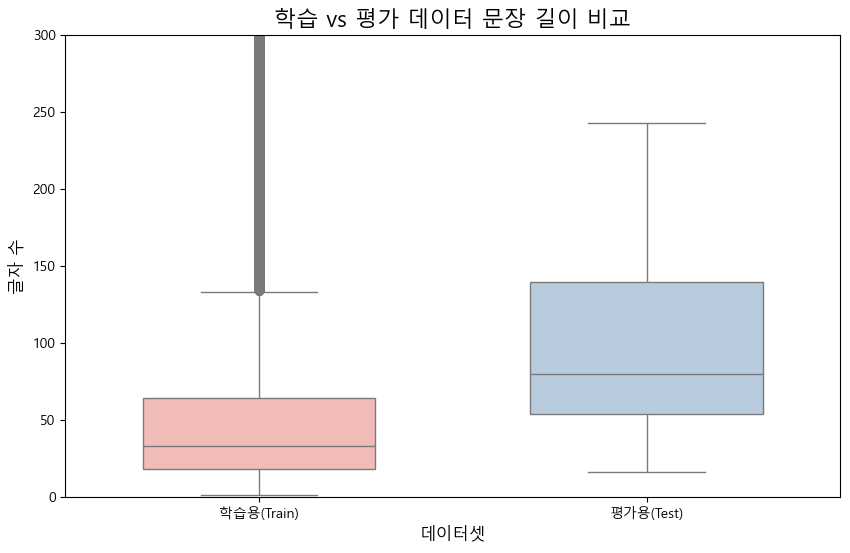

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# 1. 한글 폰트 설정
if os.name == 'nt':
    plt.rc('font', family='Malgun Gothic')
elif os.name == 'posix':
    plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 로드
# (이미 로드되어 있다면 이 부분은 생략해도 됩니다)
train_df = pd.read_csv('학습용/final_train_data.csv')
naver_df = pd.read_excel('평가용/naver_review_15.xlsx')
google_df = pd.read_excel('평가용/2_google_reviews_collected.xlsx')
# 컬럼명 통일 및 합치기
naver_df = naver_df[['platform', 'review', 'label']].rename(columns={'review': 'text'})
google_df = google_df[['platform', 'review', 'label']].rename(columns={'review': 'text'})
test_df = pd.concat([naver_df, google_df], ignore_index=True)

# 길이 계산
train_df['length'] = train_df['text'].astype(str).apply(len)
test_df['length'] = test_df['text'].astype(str).apply(len)

# ==========================================
# 그래프 개별 출력 시작
# ==========================================

# [그래프 1] 학습 데이터 긍정/부정 비율 (파이차트)
plt.figure(figsize=(8, 8)) # 그래프 크기 설정
train_counts = train_df['label'].value_counts()
plt.pie(train_counts, labels=['긍정(1)', '부정(0)'], autopct='%1.1f%%', 
        startangle=140, colors=['#66b3ff','#ff9999'], textprops={'fontsize': 14})
plt.title('학습 데이터 긍정/부정 비율', fontsize=16)
plt.show() # 출력하고 다음으로 넘어감

# [그래프 2] 학습 데이터 문장 길이 분포 (히스토그램)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['length'], bins=50, color='skyblue')
plt.title('학습 데이터 문장 길이 분포', fontsize=16)
plt.xlabel('글자 수', fontsize=12)
plt.ylabel('개수', fontsize=12)
plt.xlim(0, 200)
plt.grid(axis='y', linestyle='--') # 가로 보조선 추가
plt.show()

# [그래프 3] 평가 데이터 플랫폼별 분포 (바 차트)
plt.figure(figsize=(10, 6))
sns.countplot(x='platform', hue='label', data=test_df, palette='Set2')
plt.title('평가 데이터 플랫폼별 긍정/부정 분포', fontsize=16)
plt.xlabel('플랫폼', fontsize=12)
plt.ylabel('개수', fontsize=12)
plt.legend(title='라벨', labels=['부정(0)', '긍정(1)'], fontsize=12)
plt.show()

# [그래프 4] 학습 vs 평가 데이터 길이 비교 (박스 플롯)
plt.figure(figsize=(10, 6))
comp_df = pd.DataFrame({
    'Dataset': ['학습용(Train)']*len(train_df) + ['평가용(Test)']*len(test_df),
    'Length': list(train_df['length']) + list(test_df['length'])
})
sns.boxplot(x='Dataset', y='Length', data=comp_df, palette='Pastel1', width=0.6)
plt.title('학습 vs 평가 데이터 문장 길이 비교', fontsize=16)
plt.xlabel('데이터셋', fontsize=12)
plt.ylabel('글자 수', fontsize=12)
plt.ylim(0, 300)
plt.show()

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import os

# 시각화 스타일 설정
sns.set_style("whitegrid")

# 한글 폰트 설정 (윈도우/맥 자동 감지)
if os.name == 'nt':
    plt.rc('font', family='Malgun Gothic')
elif os.name == 'posix':
    plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

print("✅ 라이브러리 및 폰트 설정 완료!")

✅ 라이브러리 및 폰트 설정 완료!


In [32]:
import pandas as pd
import numpy as np
import os

dfs = []

print(f"📂 현재 작업 경로: {os.getcwd()}")
print("📂 데이터 로드 시작...")

# ==========================================
# (1) 학습용 데이터 로드 (기존 성공 부분)
# ==========================================

# 1. Kaggle
try:
    df_kaggle = pd.read_csv('학습용/poi_review_corpus.txt', sep='\t')[['content', 'label']]
    df_kaggle.columns = ['text', 'label']
    df_kaggle['source'] = 'Kakao(Kaggle)'
    dfs.append(df_kaggle)
    print("   ✅ Kakao(Kaggle) 로드 완료")
except Exception as e:
    print(f"   ❌ Kakao 파일 로드 실패: {e}")

# 2. NSMC
try:
    df_nsmc = pd.read_table('학습용/ratings_train.txt')[['document', 'label']]
    df_nsmc.columns = ['text', 'label']
    df_nsmc['source'] = 'NSMC(Movie)'
    dfs.append(df_nsmc)
    print("   ✅ NSMC 로드 완료")
except Exception as e:
    print(f"   ❌ NSMC 파일 로드 실패: {e}")

# 3. AI Hub
try:
    df_aihub = pd.read_csv('학습용/aihub_shuffled_15k.csv')[['text', 'label']]
    df_aihub['source'] = 'AI Hub(Shopping)'
    dfs.append(df_aihub)
    print("   ✅ AI Hub 로드 완료")
except Exception as e:
    print(f"   ❌ AI Hub 파일 로드 실패: {e}")

# ==========================================
# (2) 평가용 데이터 로드 (수정된 부분!)
# ==========================================

# 4. Naver (엑셀)
path_naver = '평가용/naver_review_15.xlsx'  # 경로 변수 지정

if os.path.exists(path_naver):
    try:
        # [수정] 파일명만 넣지 말고 path_naver 변수 그대로 사용!
        df_n = pd.read_excel(path_naver) 
        col = 'review' if 'review' in df_n.columns else 'text'
        df_n = df_n[[col, 'label']].rename(columns={col:'text'})
        df_n['source'] = 'Naver'
        dfs.append(df_n)
        print(f"   ✅ Naver 로드 완료 ({len(df_n)}개)")
    except Exception as e:
        print(f"   ❌ Naver 에러: {e}")
else:
    print(f"   ⚠️ 파일 없음: {path_naver}")

# 5. Google (엑셀)
path_google = '평가용/2_google_reviews_collected.xlsx' # 경로 변수 지정

if os.path.exists(path_google):
    try:
        # [수정] path_google 사용
        df_g = pd.read_excel(path_google)
        col = 'review' if 'review' in df_g.columns else 'text'
        df_g = df_g[[col, 'label']].rename(columns={col:'text'})
        df_g['source'] = 'Google'
        dfs.append(df_g)
        print(f"   ✅ Google 로드 완료 ({len(df_g)}개)")
    except Exception as e:
        print(f"   ❌ Google 에러: {e}")
else:
    print(f"   ⚠️ 파일 없음: {path_google}")

# 6. YouTube (CSV)
path_youtube = '테스트용/youtube_comments.csv' # 경로 변수 지정

if os.path.exists(path_youtube):
    try:
        # [수정] path_youtube 사용
        df_y = pd.read_csv(path_youtube)
        col = 'comment' if 'comment' in df_y.columns else 'text'
        df_y = df_y[[col]].rename(columns={col:'text'})
        df_y['label'] = np.nan 
        df_y['source'] = 'YouTube'
        dfs.append(df_y)
        print(f"   ✅ YouTube 로드 완료 ({len(df_y)}개)")
    except Exception as e:
        print(f"   ❌ YouTube 에러: {e}")
else:
    print(f"   ⚠️ 파일 없음: {path_youtube}")

# ==========================================
# 최종 통합
# ==========================================
if dfs:
    full_df = pd.concat(dfs, ignore_index=True)
    full_df.dropna(subset=['text'], inplace=True)
    print("\n🎉 전체 통합 성공!")
    print(full_df['source'].value_counts())
else:
    print("\n🚨 로드된 데이터가 하나도 없습니다.")

📂 현재 작업 경로: C:\Users\dosl1\homework
📂 데이터 로드 시작...
   ✅ Kakao(Kaggle) 로드 완료
   ✅ NSMC 로드 완료
   ✅ AI Hub 로드 완료
   ✅ Naver 로드 완료 (15개)
   ✅ Google 로드 완료 (15개)
   ✅ YouTube 로드 완료 (100개)

🎉 전체 통합 성공!
source
NSMC(Movie)         149995
Kakao(Kaggle)       100000
AI Hub(Shopping)     15023
YouTube                100
Naver                   15
Google                  15
Name: count, dtype: int64


In [33]:
# 분석 함수 정의
def analyze_text_features(text):
    text = str(text)
    
    # 1. 길이
    length = len(text)
    
    # 2. 존댓말 여부
    is_polite = 1 if text.endswith(('요', '니다', '죠', '습니까', '시요')) else 0
    
    # 3. 이모티콘/특수문자 여부
    has_emoji = 1 if re.search(r'[^가-힣a-zA-Z0-9\s]', text) else 0
    
    # 4. 긍정 키워드
    pos_keywords = ['맛있', '최고', '추천', '좋', '사랑', '짱', '친절', '굿', '존맛']
    has_pos = 1 if any(word in text for word in pos_keywords) else 0
    
    # 5. 부정 키워드
    neg_keywords = ['별로', '최악', '다신', '맛없', '실망', '아깝', '비추', '불친절']
    has_neg = 1 if any(word in text for word in neg_keywords) else 0

    return pd.Series([length, is_polite, has_emoji, has_pos, has_neg])

print("🕵️‍♀️ 텍스트 특징 분석 중... (데이터 양에 따라 10초~1분 소요)")
if 'full_df' in locals():
    full_df[['len', 'is_polite', 'has_emoji', 'has_pos', 'has_neg']] = full_df['text'].apply(analyze_text_features)
    print("✅ 특징 추출 완료!")
else:
    print("❌ Cell 2를 먼저 실행해주세요!")

🕵️‍♀️ 텍스트 특징 분석 중... (데이터 양에 따라 10초~1분 소요)
✅ 특징 추출 완료!


C:\Users\dosl1\AppData\Local\Temp\ipykernel_23708\2273520698.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='source', y='len', data=full_df, order=all_sources_order, palette='Set3')


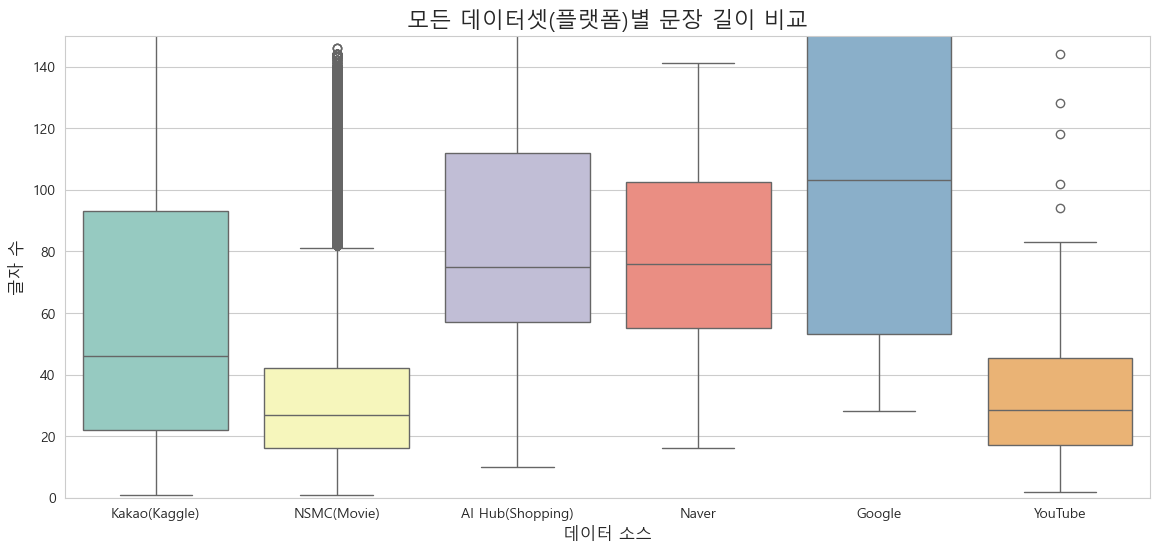

C:\Users\dosl1\AppData\Local\Temp\ipykernel_23708\2273520698.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='source', y='is_polite', data=full_df, order=all_sources_order, palette='Pastel1', errorbar=None)


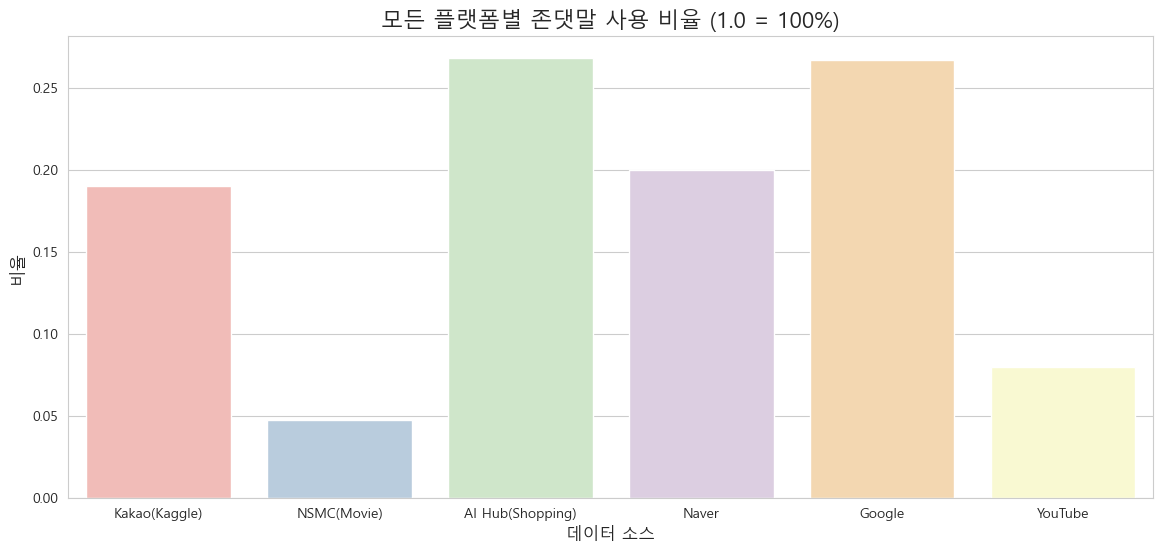

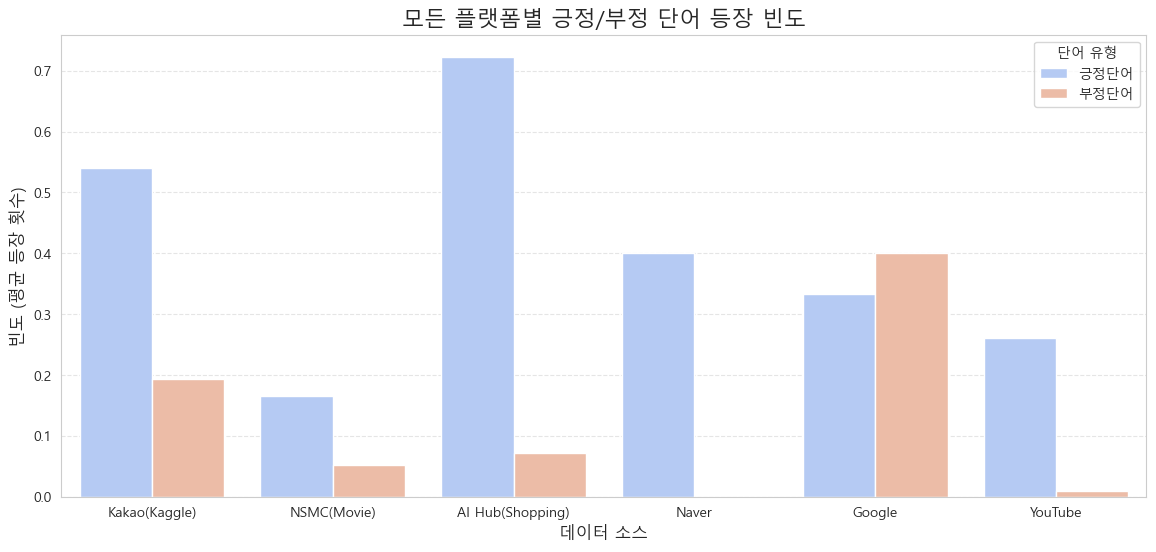

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프에 표시할 순서 지정 (학습용 3개 -> 평가용 3개)
all_sources_order = [
    'Kakao(Kaggle)', 'NSMC(Movie)', 'AI Hub(Shopping)', 
    'Naver', 'Google', 'YouTube'
]

# ==========================================
# [그래프 1] 플랫폼별 문장 길이 비교
# ==========================================
plt.figure(figsize=(14, 6))
sns.boxplot(x='source', y='len', data=full_df, order=all_sources_order, palette='Set3')
plt.title('모든 데이터셋(플랫폼)별 문장 길이 비교', fontsize=16)
plt.ylabel('글자 수', fontsize=12)
plt.xlabel('데이터 소스', fontsize=12)
plt.ylim(0, 150) # 가독성을 위해 y축 제한
plt.show()

# ==========================================
# [그래프 2] 플랫폼별 존댓말 사용 비율
# ==========================================
plt.figure(figsize=(14, 6))
sns.barplot(x='source', y='is_polite', data=full_df, order=all_sources_order, palette='Pastel1', errorbar=None)
plt.title('모든 플랫폼별 존댓말 사용 비율 (1.0 = 100%)', fontsize=16)
plt.ylabel('비율', fontsize=12)
plt.xlabel('데이터 소스', fontsize=12)
plt.show()

# ==========================================
# [그래프 3] 플랫폼별 긍정/부정 단어 사용 빈도
# ==========================================
# 1. 필터링 없이 전체 데이터 사용
comp_df = full_df.copy() 

# 2. 데이터 변형 (Melt)
melted_df = comp_df.melt(id_vars=['source'], value_vars=['has_pos', 'has_neg'], var_name='Type', value_name='Count')

plt.figure(figsize=(14, 6))
sns.barplot(x='source', y='Count', hue='Type', data=melted_df, order=all_sources_order, palette='coolwarm', errorbar=None)
plt.title('모든 플랫폼별 긍정/부정 단어 등장 빈도', fontsize=16)
plt.ylabel('빈도 (평균 등장 횟수)', fontsize=12)
plt.xlabel('데이터 소스', fontsize=12)
plt.legend(title='단어 유형', labels=['긍정단어', '부정단어'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [40]:
print("📝 [보고서 작성용 데이터 요약]")
print("="*60)

for src in full_df['source'].unique():
    subset = full_df[full_df['source'] == src]
    
    print(f"\n📌 [{src}]")
    print(f"   - 데이터 개수: {len(subset)}개")
    print(f"   - 평균 길이: {subset['len'].mean():.1f}자")
    print(f"   - 존댓말 비율: {subset['is_polite'].mean()*100:.1f}%")
    print(f"   - 긍정단어 빈도: {subset['has_pos'].mean()*100:.1f}% / 부정단어 빈도: {subset['has_neg'].mean()*100:.1f}%")
    
    print(f"   ▶ 예시 리뷰:")
    try:
        # 랜덤으로 3개 뽑기
        samples = subset['text'].sample(3, random_state=42)
        for i, txt in enumerate(samples):
            # 너무 길면 60자에서 자르기 (에러 방지용 str 변환 추가)
            display_txt = str(txt)[:60] + "..." if len(str(txt)) > 60 else str(txt)
            print(f"     {i+1}. {display_txt}")
    except:
        print("     (데이터가 부족하여 예시를 출력할 수 없습니다)")

# ▼▼▼ 여기부터는 for문 밖으로 빼야(들여쓰기 제거) 한 번만 출력됩니다 ▼▼▼
print("\n" + "="*60)
print("📊 [추가 분석] 플랫폼별 실제 긍정(1)/부정(0) 라벨 비율")
print("="*60)
# 각 소스별로 라벨(label) 비율 계산
print(full_df.groupby('source')['label'].value_counts(normalize=True).unstack())

📝 [보고서 작성용 데이터 요약]

📌 [Kakao(Kaggle)]
   - 데이터 개수: 100000개
   - 평균 길이: 76.7자
   - 존댓말 비율: 19.0%
   - 긍정단어 빈도: 54.0% / 부정단어 빈도: 19.4%
   ▶ 예시 리뷰:
     1. 1점도 안주고 싶음 옆에서 비닐나와서 바꿔준다고 가져갔는데 내 국밥에선 큐빅이 나왔음..ㅎ
     2. 다른 곳과 맛차이가 있음
     3. 혼자먹기 적당하고 맛있어서 만원짜리 일인세트 종종 포장해먹었는데 요새 문을 왜 안열죠ㅠㅜ

📌 [NSMC(Movie)]
   - 데이터 개수: 149995개
   - 평균 길이: 35.2자
   - 존댓말 비율: 4.8%
   - 긍정단어 빈도: 16.6% / 부정단어 빈도: 5.2%
   ▶ 예시 리뷰:
     1. 원본이 최고
     2. 스릴감과 훈훈함이 있는 영화.
     3. 굉장히 저평가되는 영화중 하나라고 생각함

📌 [AI Hub(Shopping)]
   - 데이터 개수: 15023개
   - 평균 길이: 111.8자
   - 존댓말 비율: 26.8%
   - 긍정단어 빈도: 72.3% / 부정단어 빈도: 7.2%
   ▶ 예시 리뷰:
     1. 친구들이 다들 왜 그렇게 건조기 사라고 했는지 알게 됐어요!!정말 망설이다가 여름 장마철이 길어지면서 올 해...
     2. 발림이 부드럽고 보습력이 좋아서 겨울에도 사용하기 좋습니다. 마침 적립금이 쌓여 있어서 구매하니 좋네요.
     3. 바람이 부드럽게 잘 나오고 풍속조절도 미세하게 되어서 좋습니다. 소음도 생각보다 없는편이라 조용하고요. 가격...

📌 [Naver]
   - 데이터 개수: 15개
   - 평균 길이: 84.5자
   - 존댓말 비율: 20.0%
   - 긍정단어 빈도: 40.0% / 부정단어 빈도: 0.0%
   ▶ 예시 리뷰:
     1. 튀김은 겉이 바삭 ~ 하고 맛있었습니다 !
     2. 머리 자르고싶어 급하게 찾아서 갔습니다. 디자이너분 처음

In [42]:
! pip install konlpy

  Using cached konlpy-0.6.0-py2.py3-none-any.whl.metadata (1.9 kB)
Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------------------------------------- 4.0/4.0 MB 26.7 MB/s  0:00:00

   ---------------------------------------- 0/3 [lxml]
   ---------------------------------------- 0/3 [lxml]
   ------------- -------------------------- 1/3 [JPype1]
   -------------------------- ------------- 2/3 [konlpy]
   ---------------------------------------- 3/3 [konlpy]



In [44]:
from konlpy.tag import Okt
from collections import Counter
import pandas as pd

# 1. 형태소 분석기 생성 (수업자료 171p 참고)
okt = Okt()

# 2. 불용어(Stopwords) 정의 (수업자료 168p 참고)
# 분석에 불필요한 조사, 기호, 공통 단어 제거
stop_words = ['은', '는', '이', '가', '을', '를', '의', '에', '에서', '로', '으로', '하다', '한', '와', '과', '도', '고', '다', '그', '너무', '정말', '진짜', '있다', '없다', '것', '수']

def get_top_keywords(text_series, top_n=10):
    """텍스트 리스트를 받아 상위 키워드(명사/형용사)를 추출하는 함수"""
    tokens = []
    # 데이터가 많으면 오래 걸리므로, 플랫폼별로 1,000개만 샘플링해서 분석 (전체 분석 시 sample 제거)
    sample_text = text_series.sample(min(len(text_series), 1000), random_state=42)
    
    for text in sample_text:
        # 형태소 분석 및 품사 태깅 (Stemming 적용)
        try:
            # 명사(Noun)와 형용사(Adjective)만 추출 (감성 분석에 중요)
            tagged = okt.pos(str(text), stem=True)
            for word, pos in tagged:
                if pos in ['Noun', 'Adjective'] and len(word) > 1 and word not in stop_words:
                    tokens.append(word)
        except:
            pass
            
    # 빈도수 계산
    return Counter(tokens).most_common(top_n)

# ==========================================
# 플랫폼별 상위 단어 추출 및 출력
# ==========================================
print("📊 [심화 분석] 플랫폼별 최다 등장 단어 (Top 10)")
print("="*60)

target_sources = ['Kakao(Kaggle)', 'NSMC(Movie)', 'AI Hub(Shopping)', 'Naver', 'Google', 'YouTube']

for src in target_sources:
    subset = full_df[full_df['source'] == src]
    if len(subset) > 0:
        top_words = get_top_keywords(subset['text'])
        print(f"\n📌 [{src}] 키워드 Top 10")
        print(top_words)
    else:
        print(f"\n📌 [{src}] 데이터 없음")

📊 [심화 분석] 플랫폼별 최다 등장 단어 (Top 10)

📌 [Kakao(Kaggle)] 키워드 Top 10
[('맛있다', 262), ('좋다', 220), ('친절하다', 145), ('같다', 136), ('아니다', 123), ('사장', 118), ('가격', 112), ('주문', 110), ('음식', 102), ('직원', 90)]

📌 [NSMC(Movie)] 키워드 Top 10
[('영화', 309), ('좋다', 76), ('재밌다', 65), ('같다', 58), ('아니다', 53), ('사람', 44), ('스토리', 42), ('최고', 38), ('감동', 38), ('평점', 37)]

📌 [AI Hub(Shopping)] 키워드 Top 10
[('좋다', 1080), ('같다', 386), ('사용', 383), ('제품', 318), ('구매', 246), ('가격', 227), ('이다', 199), ('편하다', 194), ('저렴하다', 168), ('만족하다', 135)]

📌 [Naver] 키워드 Top 10
[('맛있다', 4), ('시간', 4), ('많다', 4), ('헤어스타일', 4), ('머리', 3), ('처음', 3), ('느낌', 3), ('방문', 3), ('직원', 3), ('얼굴', 3)]

📌 [Google] 키워드 Top 10
[('롯데리아', 6), ('매장', 6), ('병원', 5), ('대림역', 4), ('이다', 4), ('다시', 4), ('커피', 4), ('좋다', 4), ('버거', 3), ('그렇다', 3)]

📌 [YouTube] 키워드 Top 10
[('떡볶이', 40), ('청담', 17), ('같다', 14), ('가격', 13), ('아니다', 11), ('맛있다', 11), ('좋다', 11), ('비싸다', 10), ('스케줄', 7), ('청담동', 7)]
